# Seaborn


<img src="images/Seaborn.png" width="800"/>

data visualization library in Python built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Uses Matplotlib under the hood but has a cleaner syntax.

Works seamlessly with pandas DataFrames

Great for Statistical Plots

sns.scatterplot() | sns.lineplot() | sns.histplot() | sns.kdeplot() | sns.boxplot() | sns.barplot() | sns.heatmap() | sns.pairplot()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_excel('./DataSets Folder/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_2 = pd.read_excel('./DataSets Folder/online_retail_II.xlsx', sheet_name='Year 2010-2011')

df = pd.concat([df_1, df_2], ignore_index=True)
# combines the two dataframes (df_1 and df_2) into a single one (df), 
# resetting the index so it runs from 0 to N without duplicating indices.

print(df.shape)
print(df.columns)

(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


# Cleaning & Feature Engineering

In [5]:
df = df.dropna(subset=['InvoiceDate', 'Customer ID'])
# Drop rows from df where either InvoiceDate or Customer ID is missing (NaN).
print(df.shape)

(824364, 8)


In [6]:
cancelled_invoice_Flags = df['Invoice'].str.startswith('C', na=False)
# any content in Invoice column starting with C - considered cancelled invoice - return True
# NaN will be changed to False, also correct invoice number as well to False
cancelled_invoice_data = df[cancelled_invoice_Flags]
print(cancelled_invoice_Flags.sum(), ":  rows which has cancelled invoices")
cancelled_invoice_data['Invoice']

18744 :  rows which has cancelled invoices


178        C489449
179        C489449
180        C489449
181        C489449
182        C489449
            ...   
1065910    C581490
1067002    C581499
1067176    C581568
1067177    C581569
1067178    C581569
Name: Invoice, Length: 18744, dtype: object

In [7]:
# lets remove the cancelled ones from main Data set
df = df[~df['Invoice'].astype(str).str.startswith('C')]
# df['Invoice'].astype(str) – ensures the Invoice column is treated as a string
# .str.startswith('C') – returns True for rows where the Invoice starts with 'C'.
# ~ – inverts the condition (i.e., select rows not starting with 'C').
print(df.shape)

(805620, 8)


In [8]:
# data cleaning
# Removes rows where the quantity is 0 or negative
df = df[df['Quantity'] > 0]
# Removes free, zero-priced, or negative-priced items
df = df[df['Price'] > 0]
# Useful for ensuring all revenue calculations are accurate
print(df.shape)

(805549, 8)


In [9]:
# Add new features 

df['Revenue'] = df['Quantity'] * df['Price'] # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Ensures InvoiceDate is in datetime format,essential for : Time-based filtering (e.g., by year, month),Time series analysis, Plotting trends
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)
# Creates a new column Month like "2010-11", "2011-01", etc.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [10]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()
# Groups the DataFrame by the Month column you previously created using .dt.to_period('M').
# ['Revenue'].sum() - For each month, it sums all the revenue values.
# .sort_index() - Ensures that the months are sorted chronologically (e.g., Jan to Dec), not alphabetically.
monthly_revenue.head()

Month
2009-12    686654.160
2010-01    557319.062
2010-02    506371.066
2010-03    699608.991
2010-04    594609.192
Name: Revenue, dtype: float64

# Histogram
Distribution of Quantity per Transaction

In [12]:
df_quantity = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]
df_quantity.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


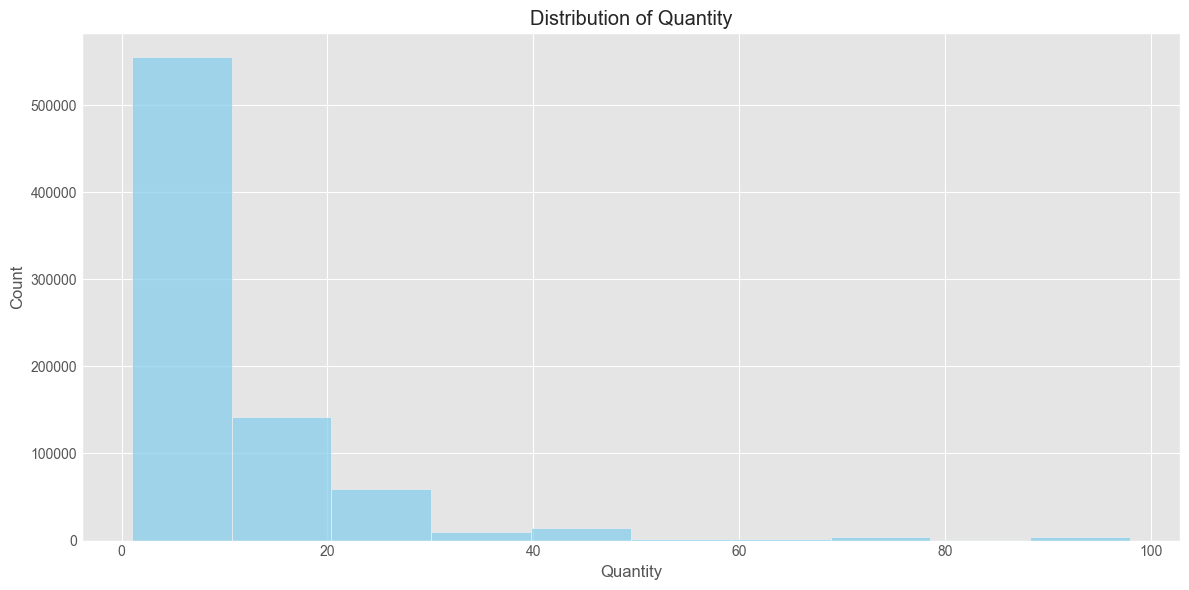

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=False, color='skyblue')
# bins=10: Divides the x-axis range into 10 intervals (bars)
# kde=False: Disables the Kernel Density Estimate curve. Only the histogram will be shown.
plt.style.use('ggplot')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

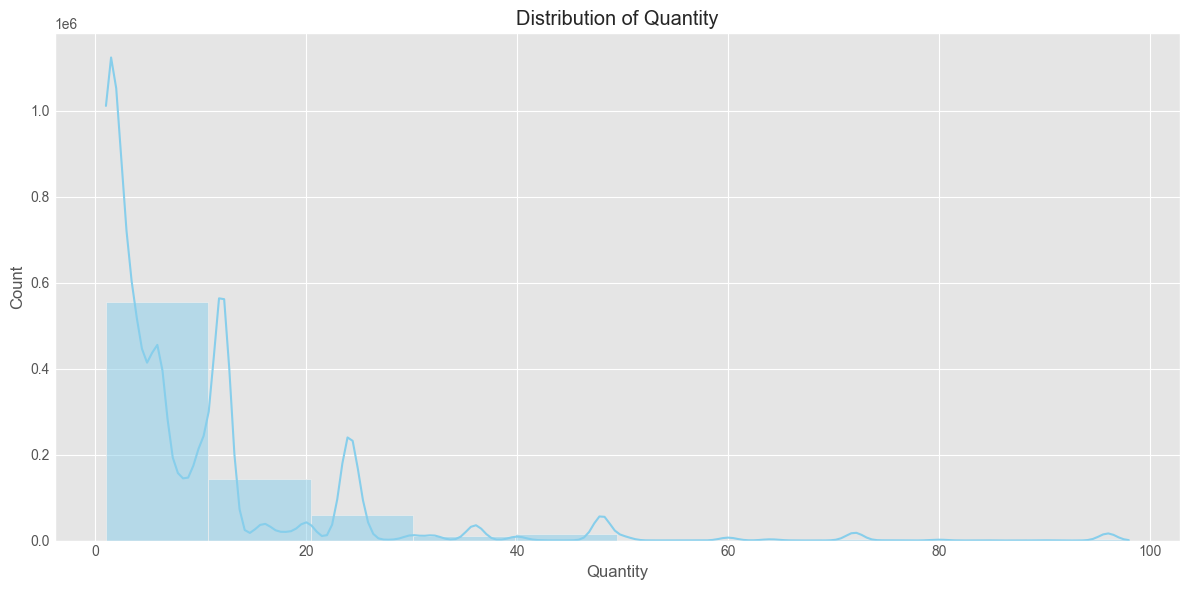

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# KDEplot - Kernel Density Estimate

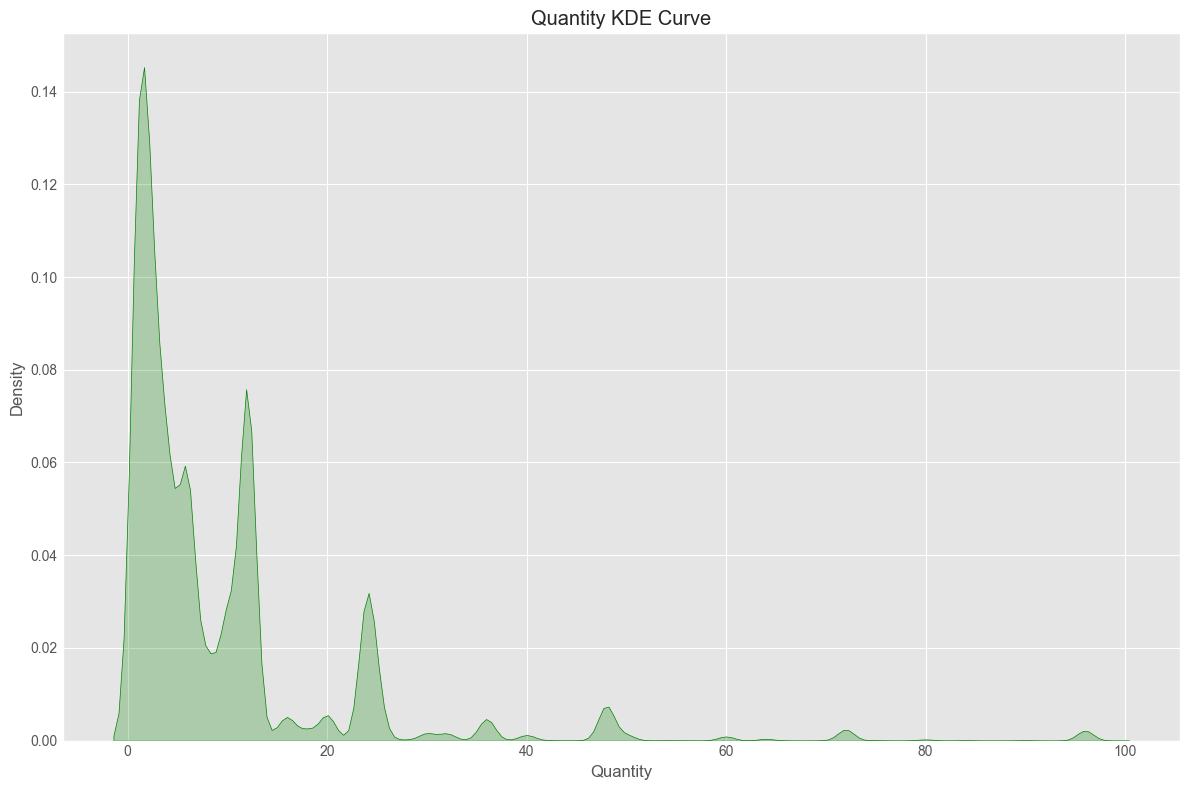

In [32]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_quantity['Quantity'], fill=True, color='green')
plt.title('Quantity KDE Curve')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

# Categorical data Visualization

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   Revenue      805549 non-null  float64       
 9   Month        805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 67.6+ MB


# Bar plot
Top Countries by Revenue (Bar Plot) (top-10)

In [34]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
# df.groupby('Country'): Groups the data by the Country column.
# ['Revenue'].sum(): For each country, it sums the Revenue
# .sort_values(ascending=False): Sorts countries by revenue in descending order.
top_countries.head()


Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Name: Revenue, dtype: float64

C:\Users\nikunj.dhaka\AppData\Local\Temp\ipykernel_33612\3104011613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


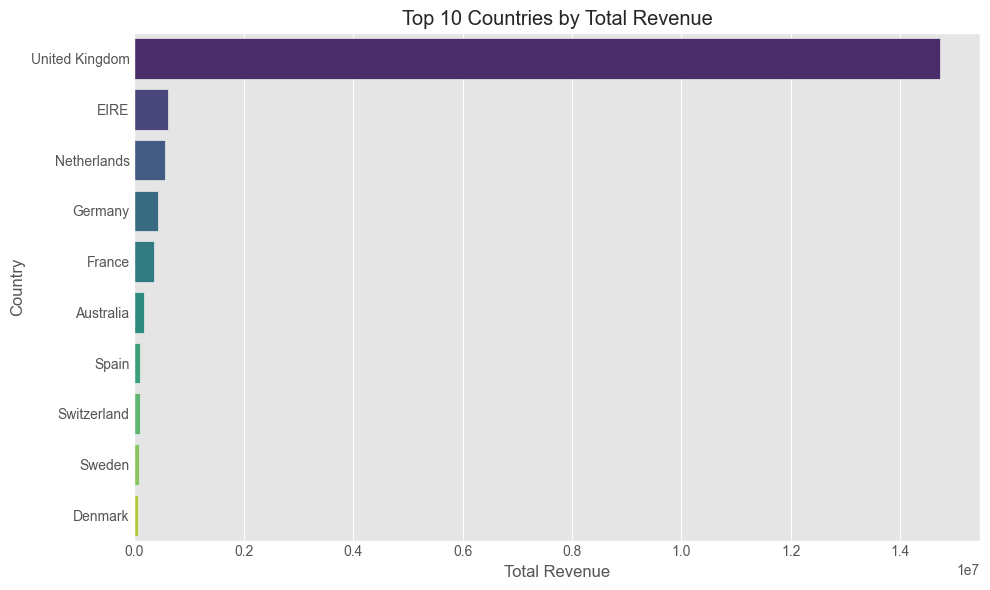

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

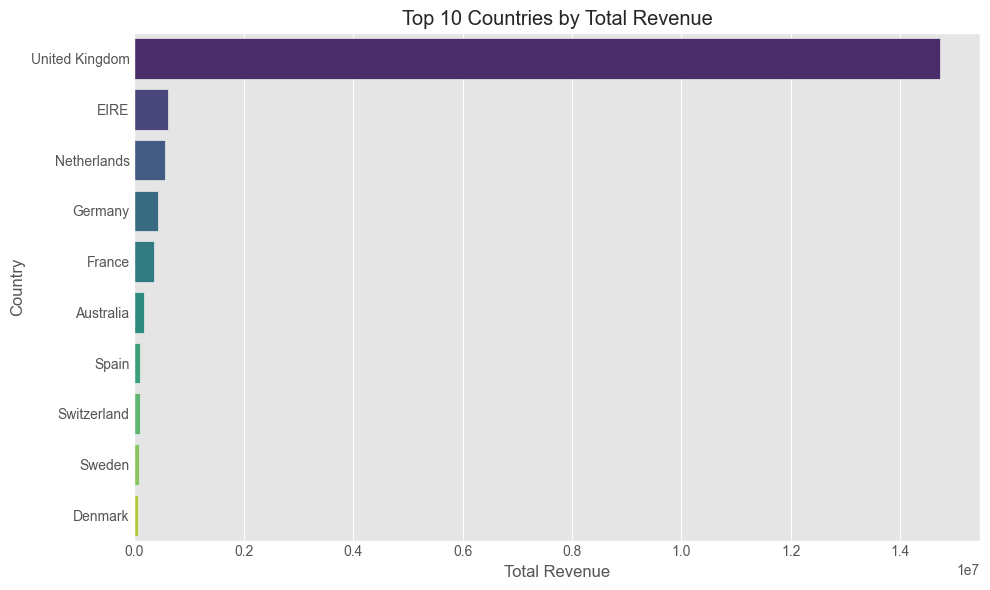

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis')
# hue=top_countries.index: Although usually used for grouping, 
# here it’s used to map each country to a unique color from the palette. 
# This resolves the deprecation warning and ensures consistent coloring.

# Normally, hue is used to split bars into multiple categories per Y-axis label. 
# But here, 
# we use it just to assign a distinct color per bar, then hide the legend.

plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

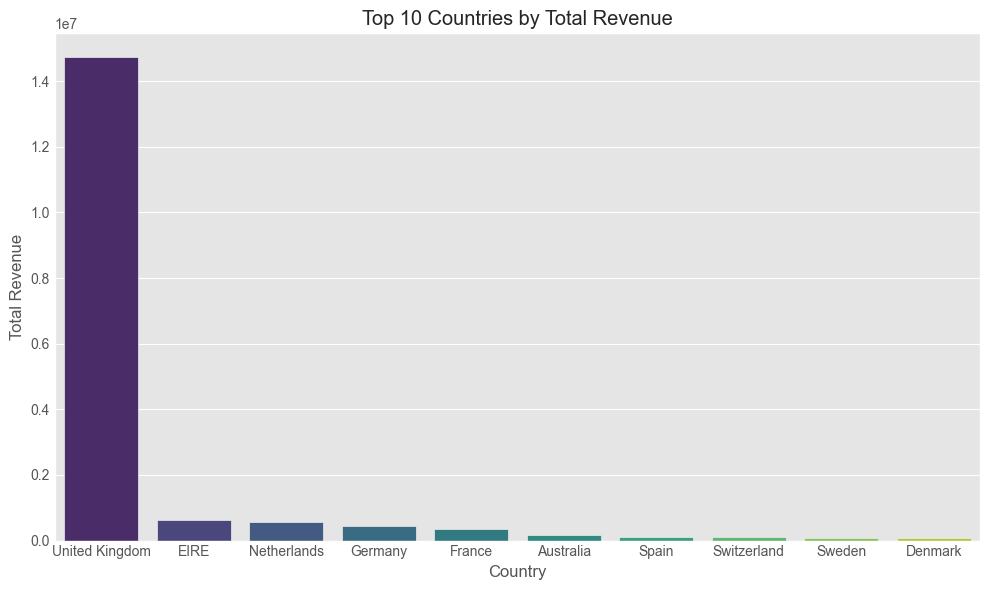

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Count Plot
### Number of Transactions by Country (Count Plot)

In [42]:
df_sample = df[['Quantity', 'Price', 'Revenue', 'Country', 'Month']].copy()
df_sample.head()

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.4,United Kingdom,2009-12
1,12,6.75,81.0,United Kingdom,2009-12
2,12,6.75,81.0,United Kingdom,2009-12
3,48,2.10,100.8,United Kingdom,2009-12
4,24,1.25,30.0,United Kingdom,2009-12


In [47]:
df_sample['Country'].value_counts().head()

Country
United Kingdom    725250
Germany            16694
EIRE               15743
France             13812
Netherlands         5088
Name: count, dtype: int64

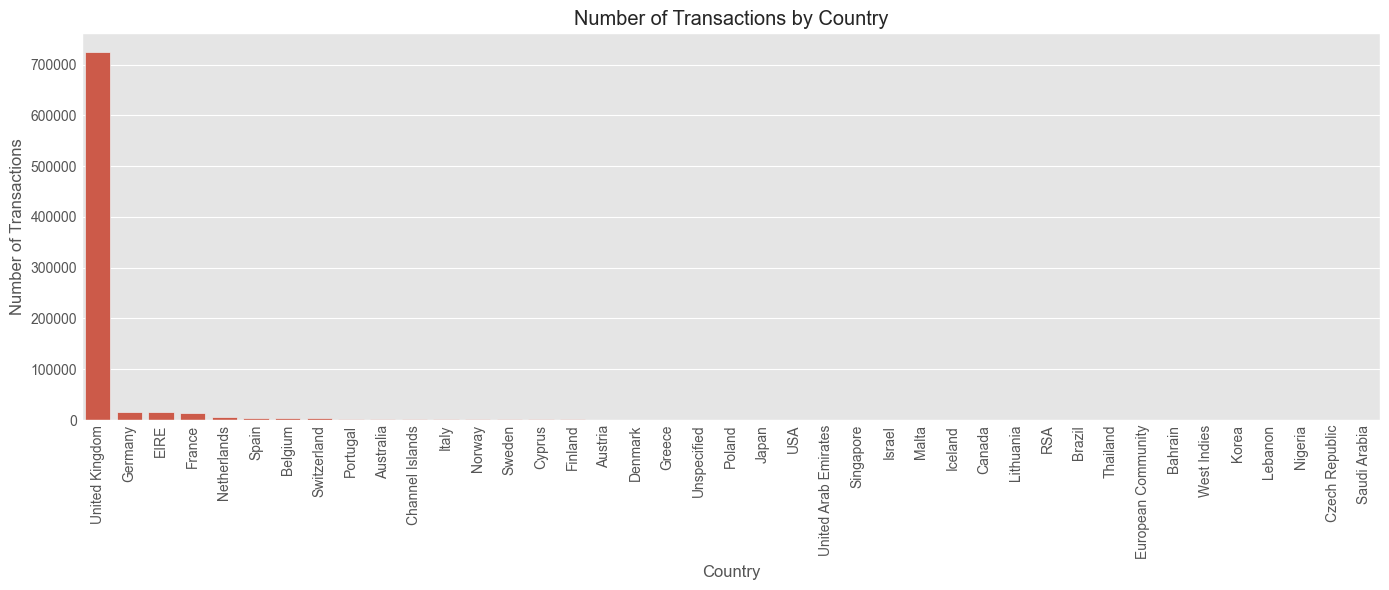

In [48]:
plt.figure(figsize=(14, 6))
# wider plot is helpful here because there may be many countries
sns.countplot(data=df_sample, x='Country', order=df_sample['Country'].value_counts().index)
# sns.countplot(...) is used to count the number of occurrences of each unique value in the Country column 
# (i.e., number of transactions per country).

# x='Country': Plot Country values on the x-axis.

# order=df_sample['Country'].value_counts().index: This sorts the countries in descending order by frequency, 
# so the most frequent countries appear first from left to right.
plt.xticks(rotation=90)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Bar Plot

In [59]:
# Top 5 countries by number of transactions
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter df to keep only those countries
df_top = df[df['Country'].isin(top_countries)].copy()

# Group by Country and Month, Sum the revenue
grouped = df_top.groupby(['Country', 'Month'])['Revenue'].sum().reset_index()
# ['Revenue'].sum() → For each Country-Month combo, it sums the Revenue.
# .reset_index() → Converts the resulting multi-indexed Series into a clean DataFrame.

grouped.head()

,Country,Month,Revenue
0,EIRE,2009-12,18170.46
1,EIRE,2010-01,65031.41
2,EIRE,2010-02,20206.46
3,EIRE,2010-03,22989.46
4,EIRE,2010-04,20668.08


In [62]:
grouped['Month'] = pd.to_datetime(grouped['Month'])
grouped = grouped.sort_values('Month')
# Sorts the entire grouped DataFrame chronologically by Month.
grouped['Month'] = grouped['Month'].dt.strftime('%Y-%m')
# After sorting, this line converts the datetime values back to string in the format YYYY-MM
grouped.reset_index(drop=True, inplace=True)
# drop=True: Removes the current index column (doesn't keep it as a new column).
# inplace=True: Applies the change directly to the df.
grouped.head()

,Country,Month,Revenue
0,EIRE,2009-12,18170.46
1,United Kingdom,2009-12,613214.90
2,France,2009-12,6521.69
3,Netherlands,2009-12,15204.73
4,Germany,2009-12,10096.85


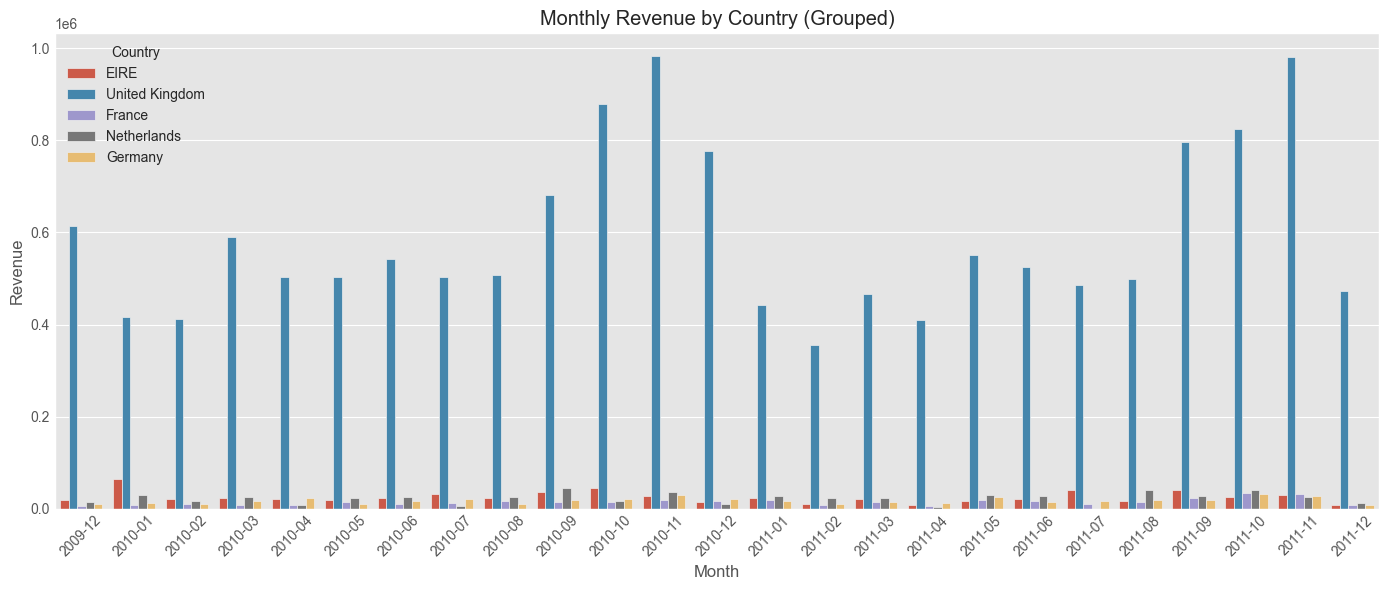

In [64]:
# Grouped Bar Plot using Seaborn

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Country')
# data=grouped: Uses the grouped DataFrame, which has columns Month, Country, and Revenue.
# x='Month': Puts each Month on the x-axis.
# y='Revenue': Bar height represents total revenue for that month.
# hue='Country': Bars are grouped by country — each country gets its own color within each month.
plt.title('Monthly Revenue by Country (Grouped)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

In [65]:
pivot_df = grouped.pivot(index='Month', columns='Country', values='Revenue').fillna(0)
# It reshapes the grouped DataFrame (which has Country, Month, and Revenue) into a pivot table 
# Converts long-form data to wide-form (pivot table).
# index='Month': Each row represents a unique month
# columns='Country': Each column becomes a country name.
# values='Revenue': The table cells contain revenue values for each (month, country) pair.

# Some countries may not have revenue in every month
# .fillna(0) - replaces any missing values (NaNs) with 0 for a complete table.


pivot_df.head()

Country,EIRE,France,Germany,Netherlands,United Kingdom
Month,,,,,
2009-12,18170.46,6521.69,10096.850,15204.73,613214.900
2010-01,65031.41,8465.63,12562.110,29230.77,416635.242
2010-02,20206.46,9024.16,9124.250,17255.39,411077.936
2010-03,22989.46,8657.59,16698.080,24447.98,589725.011
2010-04,20668.08,7405.18,23683.231,6888.78,503425.741


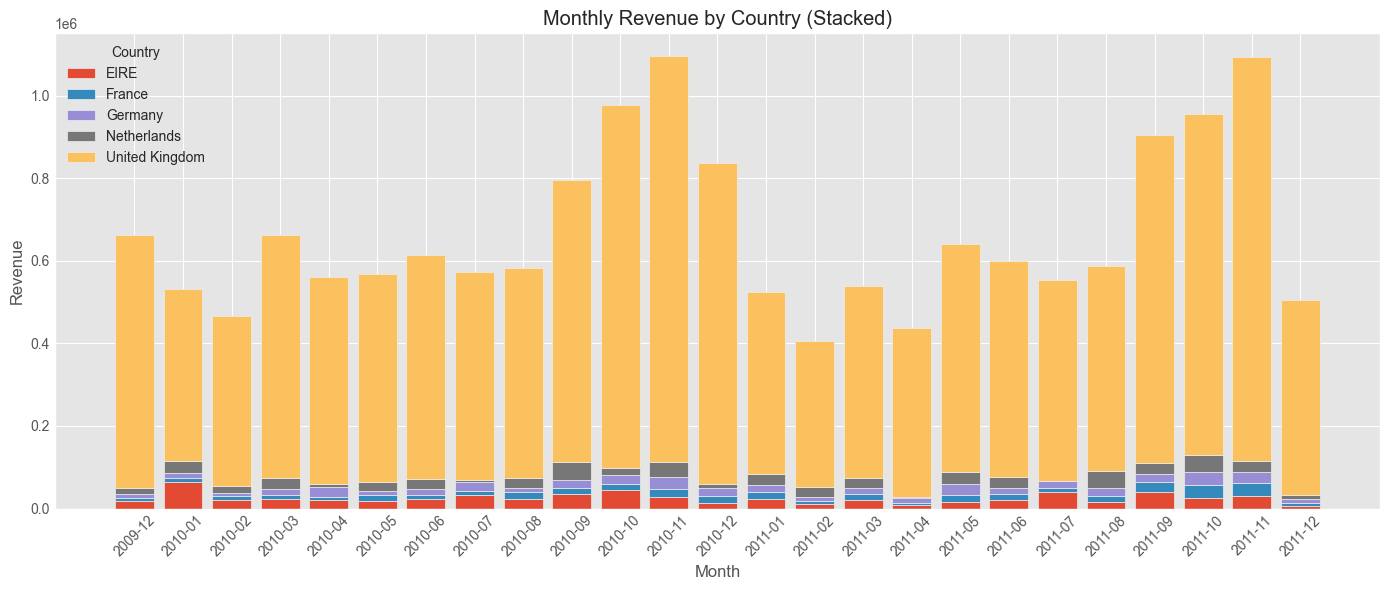

In [67]:
plt.figure(figsize=(14, 6))
bottom = None
# bottom is used to stack bars on top of each other
# Initially None, meaning the first country’s bars will start from 0.

for country in pivot_df.columns:
    plt.bar(pivot_df.index, pivot_df[country], label=country, bottom=bottom)
    bottom = pivot_df[country] if bottom is None else bottom + pivot_df[country]

# Iterates over each country (each column in pivot_df).
# plt.bar(...) draws bars for that country's monthly revenue.
# pivot_df.index = the months (x-axis)
# pivot_df[country] = revenue values (height of each bar)
# label=country = used in the legend
# bottom=bottom = where to start stacking the current bar

# bottom = ... After each loop, the bottom value is updated to include cumulative revenue so far.
# This makes the next country stack on top of the last.


plt.title('Monthly Revenue by Country (Stacked)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# scatter plot

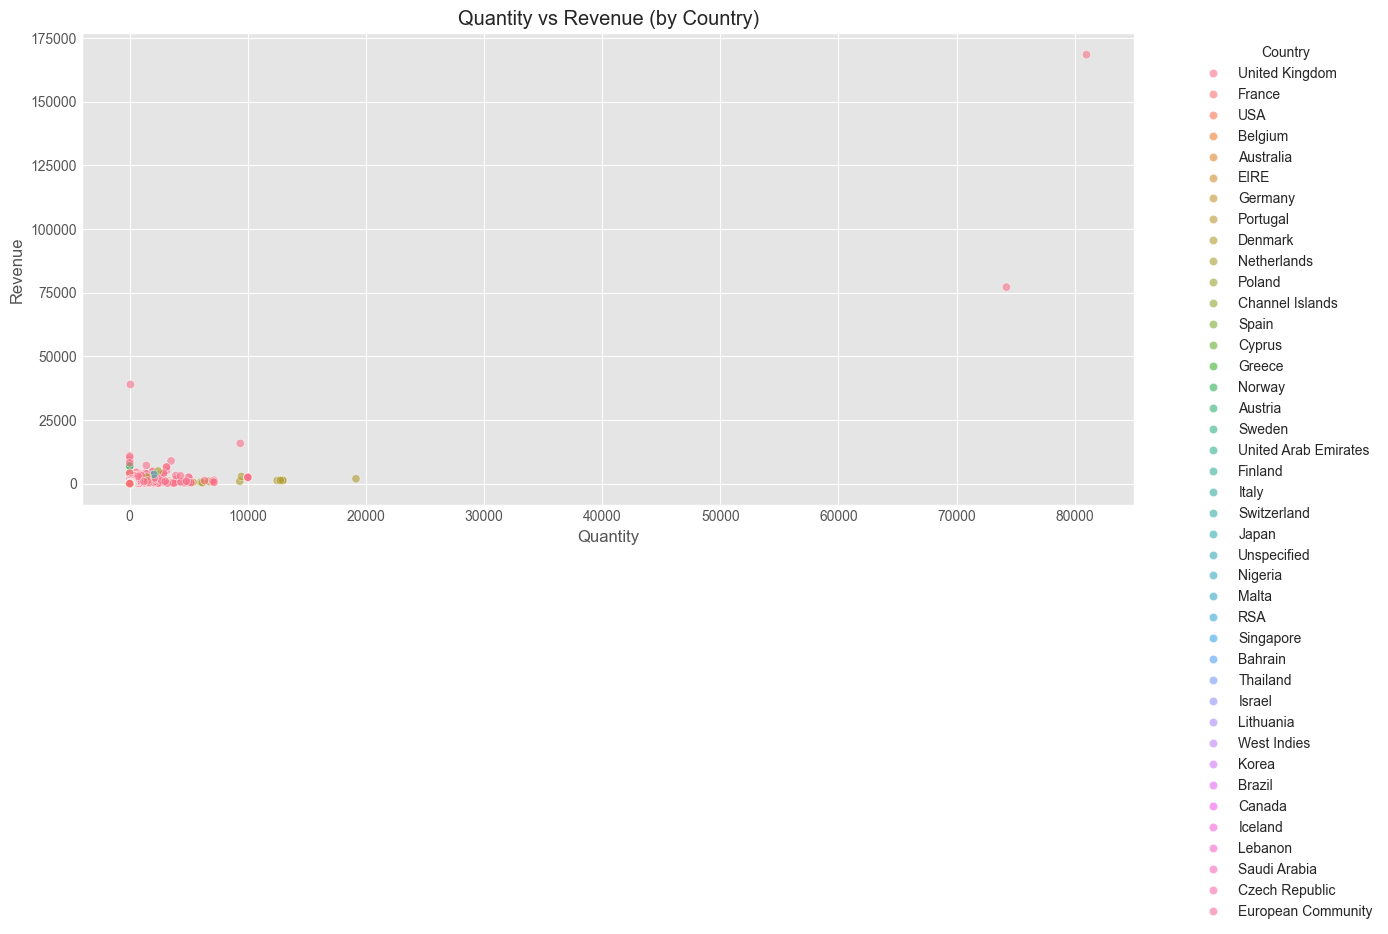

In [70]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_sample, x='Quantity', y='Revenue', hue='Country', alpha=0.6)
plt.title("Quantity vs Revenue (by Country)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

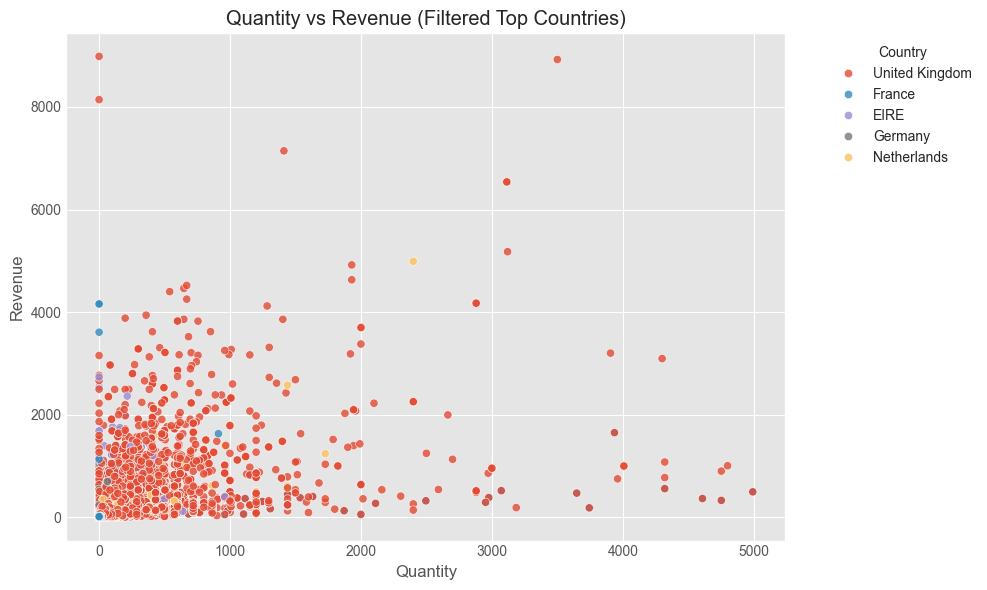

In [74]:
df_filtered = df_sample[(df_sample['Quantity'] > 0) & 
                        (df_sample['Quantity'] < 5000) & 
                        (df_sample['Revenue'] < 10000) & 
                        (df_sample['Revenue'] > 0)]

# Filters the df_sample DataFrame to include only realistic and meaningful data:
# removes extreme outliers and incorrect data for a cleaner plot
# Quantity must be positive and less than 5000
# Revenue must be between 0 and 10,000

# Focus on top countries
top_countries = df_filtered['Country'].value_counts().head(5).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
# Places the legend outside the plot (on the right side), so it doesn’t overlap with data points.
# bbox_to_anchor=(1.05, 1) moves the legend to the right.
# loc='upper left' anchors it to the top-left of that box.


plt.tight_layout()
plt.show()

In [75]:
"""plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')"""

""" plt.legend(...)"""
# This adds a legend to the plot.
# The legend helps identify what each color or marker represents 
# in this case, the Country from the hue='Country' in your scatterplot.
"""title="Country"""
# Adds a title above the legend entries.
# So instead of just listing country names, the legend is labeled "Country".
"""bbox_to_anchor=(1.05, 1)"""
# This positions the legend box relative to the plot area.
# (1.05, 1) means:
# 1.0 is the right edge of the plot
# 1.05 places the legend just a bit to the right of that edge
# 1 aligns the top of the legend box with the top of the axes
"""loc='upper left'"""
# This aligns the upper-left corner of the legend to the point defined in bbox_to_anchor.
# So the top-left corner of the legend box will sit at (1.05, 1).

"loc='upper left'"

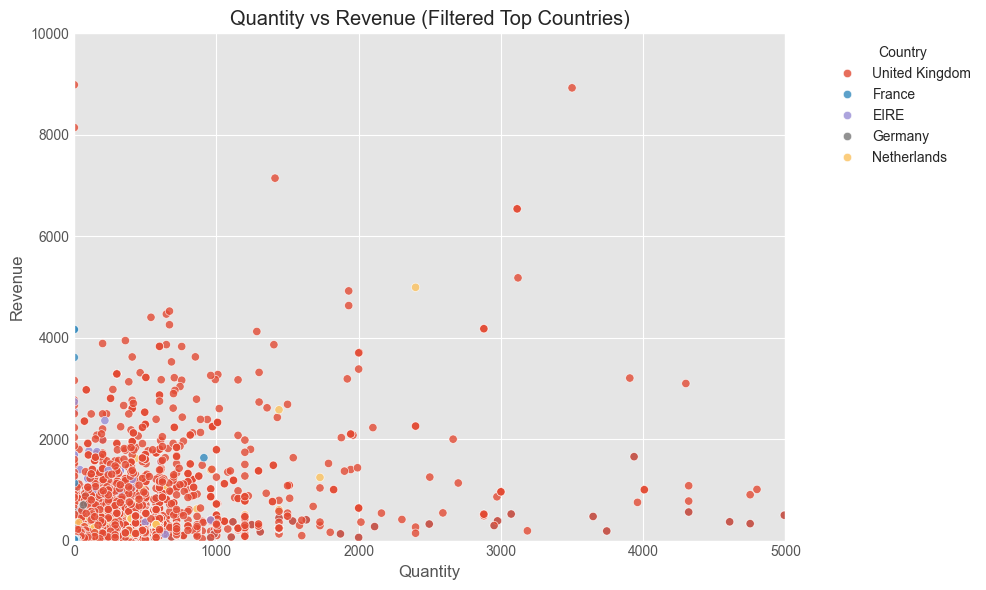

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.xlim(0, 5000)
# Limits the X-axis to show only values between 0 and 5000.
# Useful when you want to exclude outliers or focus on a specific data range (e.g., Quantity).
plt.ylim(0, 10000)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Pair Plot

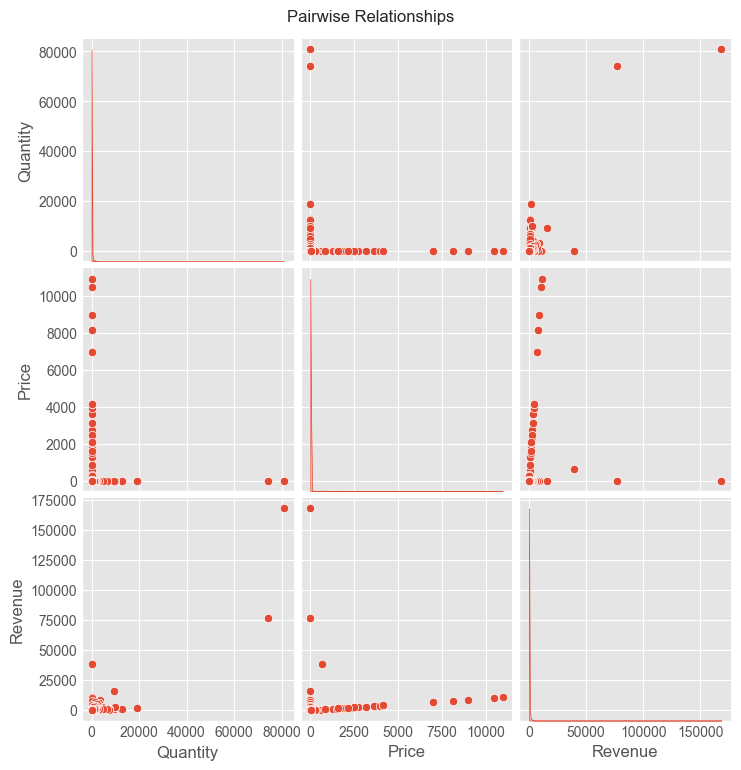

In [79]:
sns.pairplot(df_sample[['Quantity', 'Price', 'Revenue']], diag_kind='kde')
# diag_kind='kde': - On the diagonal (where variable vs. itself is plotted), it uses Kernel Density Estimate (KDE) plots 
# instead of histograms to show smooth distributions.
plt.suptitle("Pairwise Relationships", y=1.02)
# y=1.02 pushes the title slightly above the top of the plot to prevent overlap.
plt.xticks(rotation=45)
plt.show()

# sns.heatmap() Correlation Matrix
sns.heatmap() to visualize the strength and direction of linear relationships between the variables Quantity, Price, and Revenue.

In [81]:
corr_matrix = df_sample[['Quantity', 'Price', 'Revenue']].corr()
# This calculates the correlation matrix (using Pearson correlation by default).
# Output: A 3x3 matrix where each value is a correlation coefficient between two variables.
# Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).
# 0 means no linear correlation.
corr_matrix

,Quantity,Price,Revenue
Quantity,1.000000,-0.004909,0.826590
Price,-0.004909,1.000000,0.135897
Revenue,0.826590,0.135897,1.000000


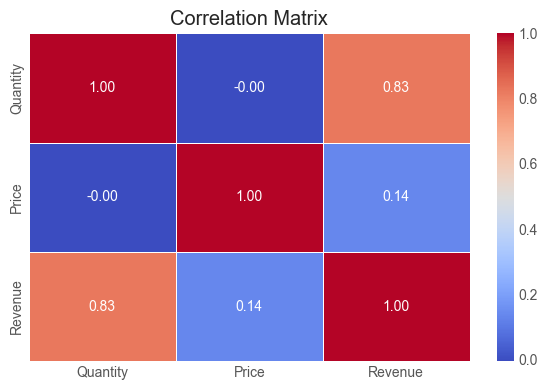

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# annot=True: Displays the numeric correlation value in each cell.
# cmap='coolwarm': Uses a diverging color map (blue for negative, red for positive).
# fmt='.2f': Shows values with 2 decimal places.
# linewidths=0.5: Adds lines between the cells for better separation

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Annotating Plots

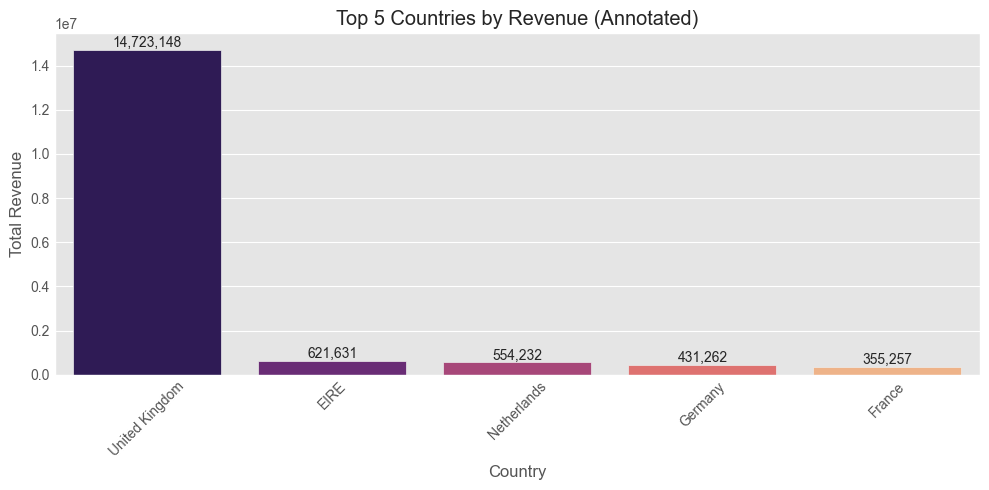

In [87]:
country_revenue = df_sample.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)
# Keeps only the top 5 countries with the highest revenue.
plt.figure(figsize=(10, 5))
sns.barplot(x=country_revenue.index, y=country_revenue.values, hue=country_revenue.index, palette='magma')

# Annotating each bar with value
for i, value in enumerate(country_revenue.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

# f'{value:,.0f}': formats the number with commas and no decimals (e.g., 1234567 → 1,234,567
# ha='center', va='bottom': centers the text horizontally and aligns it to the bottom of the text box.

plt.title("Top 5 Countries by Revenue (Annotated)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# styles and themes

C:\Users\nikunj.dhaka\AppData\Local\Temp\ipykernel_33612\4276750084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],


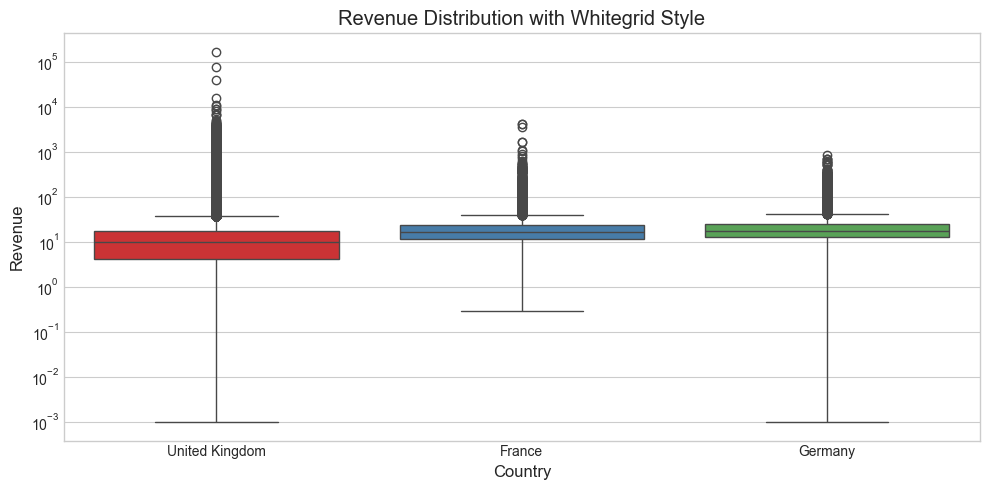

In [96]:
sns.set_style("whitegrid")  # White background, Light grey grid lines (mainly for y-axis)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],
            x='Country', y='Revenue', palette='Set1')
sns.despine(left=False, bottom=False, top=False, right=False)  # removes top and right border
# sns.despine()  # By default Removes top and right spines
# used to hide border lines to make plots cleaner
# sns.despine(left=True, bottom=True)  # removes top and right border
# sns.set_style("whitegrid") - automatically removes the top and right spines before you even call sns.despine().
plt.title("Revenue Distribution with Whitegrid Style")
plt.yscale('log') # sets the y-axis to a logarithmic scale instead of the default linear scale
plt.tight_layout()
plt.show()

# Line Plot

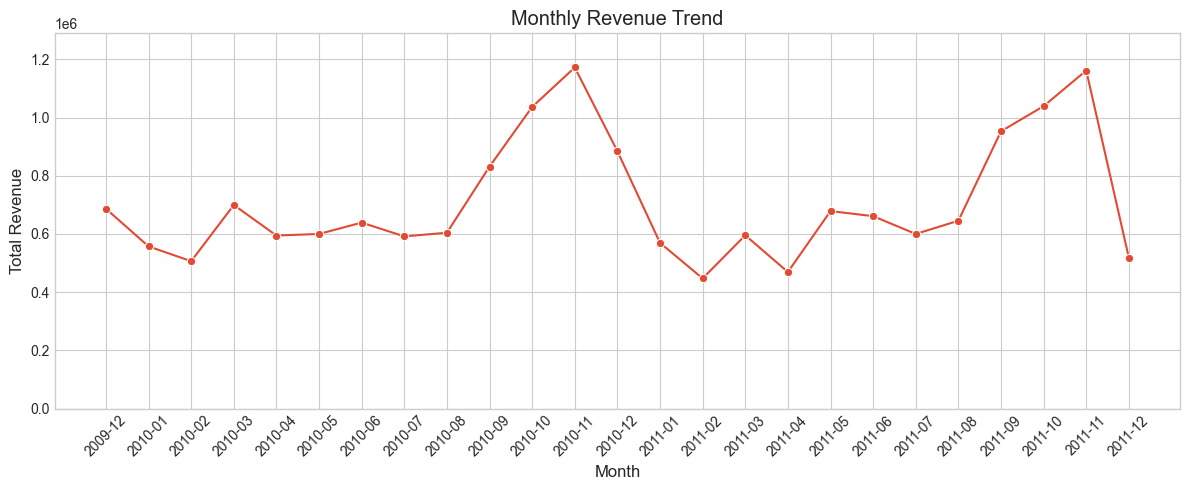

In [97]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rev.index, y=monthly_rev.values, marker='o')

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_rev.max() * 1.1)  # setting y-limit
# plt.ylim(ymin, ymax) sets the range of the y-axis from ymin to ymax.
# top of the y-axis will be set to 110% of the maximum revenue in monthly_rev (1.1 for extra space (10%) above the tallest bar )
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# FacetGrid
For combining the plots

In [98]:
top3 = ['United Kingdom', 'Germany', 'France']
df_subset = df[df['Country'].isin(top3)].copy()

df_subset_grouped = df_subset.groupby(['Month', 'Country'])['Revenue'].sum().reset_index()
df_subset_grouped.head()

,Month,Country,Revenue
0,2009-12,France,6521.69
1,2009-12,Germany,10096.85
2,2009-12,United Kingdom,613214.90
3,2010-01,France,8465.63
4,2010-01,Germany,12562.11


Seaborn’s FacetGrid to create a series of line plots, each showing monthly revenue trends for a different country — all in one clean, multi-panel layout.

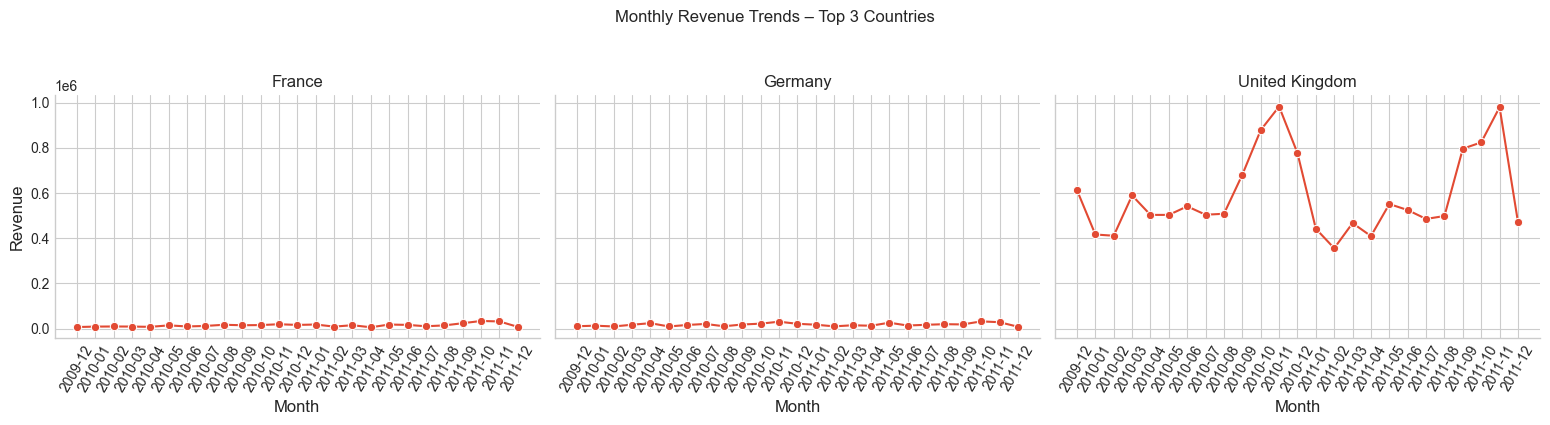

In [100]:
g = sns.FacetGrid(df_subset_grouped, col='Country', col_wrap=3, height=4, aspect=1.3)
# Creates a grid of subplots (facets) — one for each unique value in the 'Country' column
# df_subset_grouped: Your input DataFrame. -grouped by Country and Month
# col='Country': Each country will get its own subplot.
# col_wrap=3: Arrange up to 3 plots per row, then wrap to the next row if there are more.
# height=4: Each subplot is 4 inches tall.
# aspect=1.3: Controls the width (relative to height), so the plot looks wider.

g.map_dataframe(sns.lineplot, x='Month', y='Revenue', marker='o')
# Tells Seaborn to draw a line plot in each subplot:
g.set_titles("{col_name}")
g.set_xticklabels(rotation=60)
g.figure.suptitle("Monthly Revenue Trends – Top 3 Countries", y=1.05)
# g.figure.suptitle(...)
# Adds a main title above the entire FacetGrid.
# y=1.05: Positions it slightly above the top of the plots.
plt.tight_layout()
plt.show()